# Financial Data
### Source: World Data bank

#### Instructions:
In order to run this file, you must create a directory called '/data/financial' and add these files (from google drive folder data -> financial)
1. 'wrldbnk_unemployment.csv'
2. 'wrldbnk_gdp.csb'


## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import os

DATA_DIR = 'data'
FINANCIAL_DIR = os.path.join(DATA_DIR, 'financial')

SELECTED_COUNTRIES = [
'south africa',
'kenya',
'china',
'taiwan',
'japan',
'south korea',
'india',
'pakistan',
'indonesia',
'philippines',
'singapore',
'thailand',
'canada',
'united kingdom',
'ireland',
'scotland',
'australia',
'new zealand',
'united states',
'korea, rep.']

In [2]:
def load_data_frame(file_name, path):
    """
    Loads data from specified path and returns adata frame.
    """
    file_path = os.path.join(path, file_name)
    return pd.read_csv(file_path)

### Unemployment Rates - by percentage of total workforce

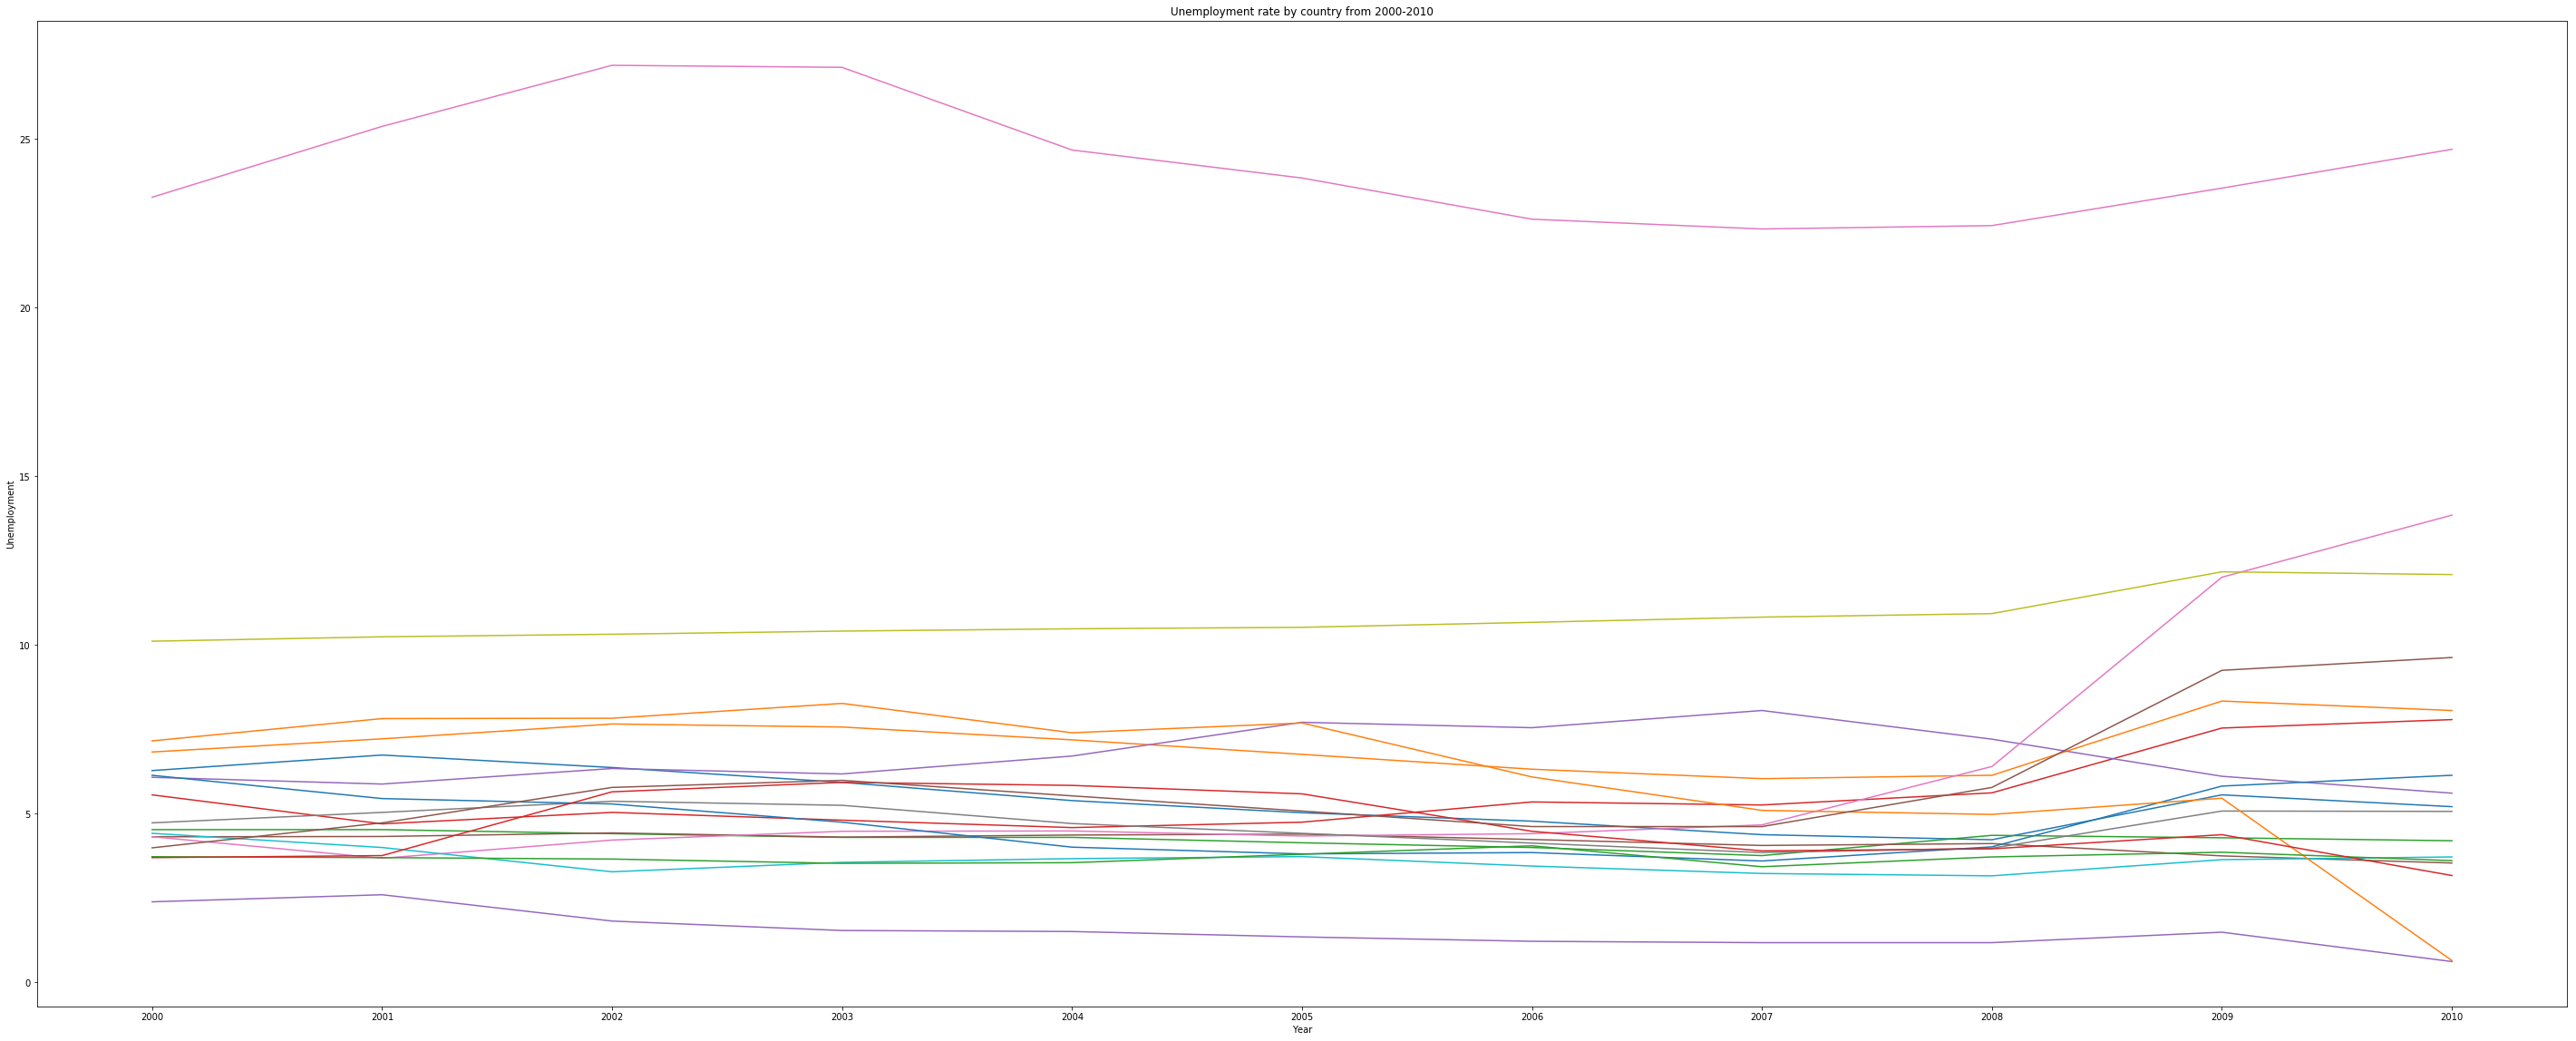

In [3]:
unemployment_df = load_data_frame('wrldbnk_unemployment.csv', FINANCIAL_DIR)

#remove unneeded columns
unemployment_df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace = True)

#replace non-numericals
unemployment_df = unemployment_df.replace('..', np.NaN)

#convert all columns of DataFrame to numeric
unemployment_df.loc[:,1:] = unemployment_df.iloc[:,1:].apply(pd.to_numeric)

#convert country names to lowercase
unemployment_df['Country Name'] = unemployment_df['Country Name'].str.lower()

#select the countries with data from newslookup.com
filtered_df = unemployment_df.loc[unemployment_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
columns = filtered_df.columns
country_index = columns.get_loc('Country Name')
start_index = columns.get_loc('2000')
end_index = columns.get_loc('2011')
filtered_df = filtered_df.iloc[:,np.r_[country_index ,start_index : end_index]]

unemployed_t = filtered_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(unemployed_t[1:])
ax.set(title='Unemployment rate by country from 2000-2010',
 ylabel='Unemployment', xlabel='Year')
plt.show()

### GDP Per Capita - Current US $

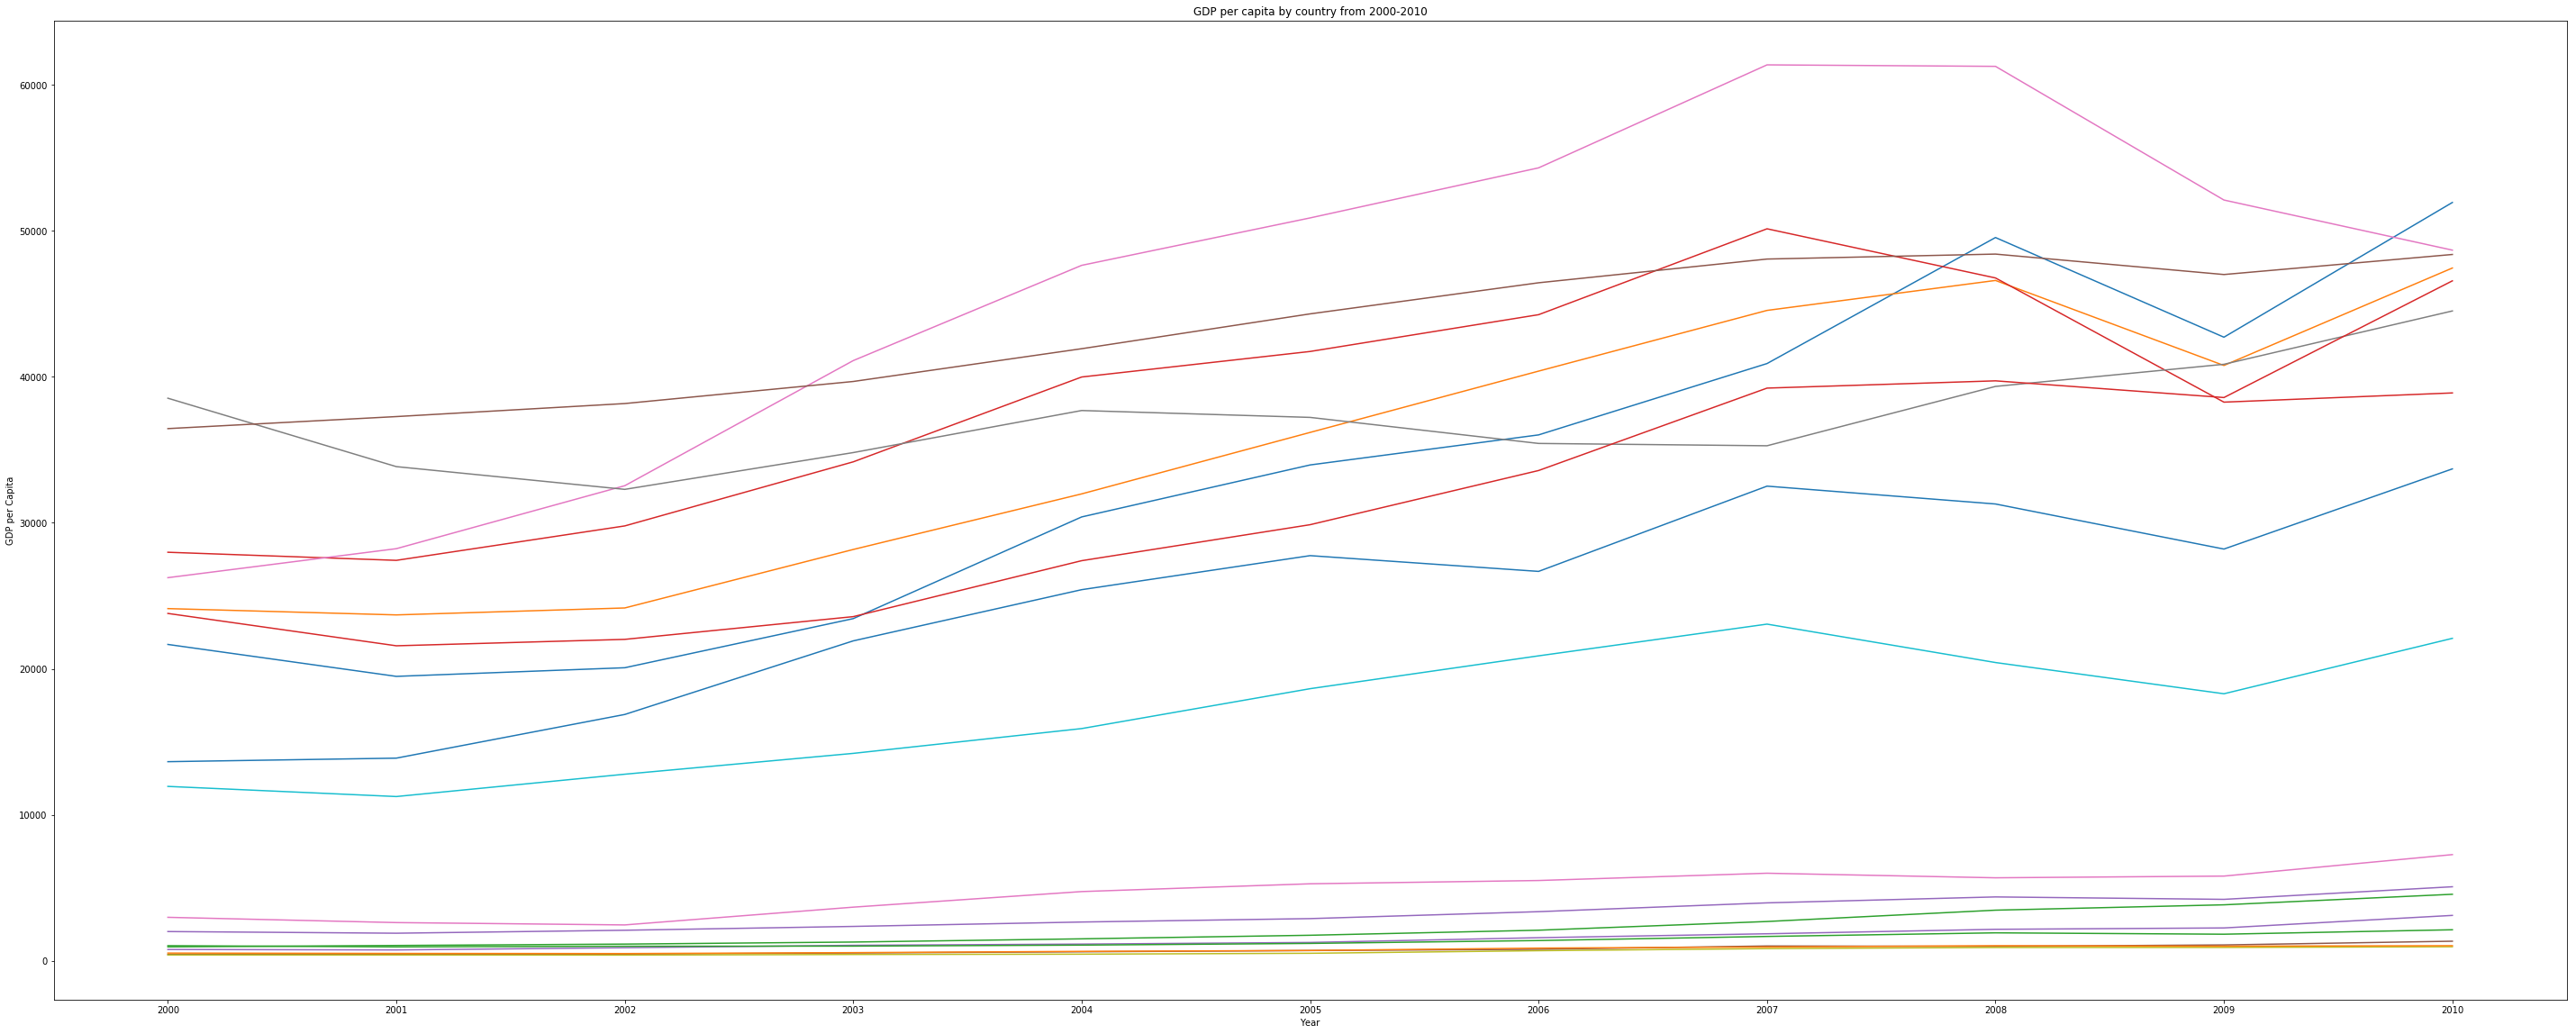

In [4]:
gdp_df = load_data_frame('wrldbnk_gdp.csv', FINANCIAL_DIR)

#remove unneeded columns
gdp_df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace = True)

#replace non-numericals
gdp_df = gdp_df.replace('..', np.NaN)

#convert all columns of DataFrame to numeric
gdp_df.loc[:,1:] = gdp_df.iloc[:,1:].apply(pd.to_numeric)

#convert country names to lowercase
gdp_df['Country Name'] = gdp_df['Country Name'].str.lower()

#select the countries with data from newslookup.com
gdp_filter_df = gdp_df.loc[gdp_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
cols = gdp_filter_df.columns
country_index = cols.get_loc('Country Name')
start_index = cols.get_loc('2000')
end_index = cols.get_loc('2011')
gdp_filter_df = gdp_filter_df.iloc[:,np.r_[country_index ,start_index : end_index]]

gdp_t = gdp_filter_df.T

fig2 = plt.figure(figsize=(50,20))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(gdp_t[1:])
ax2.set(title='GDP per capita by country from 2000-2010',
 ylabel='GDP per Capita', xlabel='Year')
plt.show()